In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import interpolate
import os

from astropy import units as u
import astropy.constants as c
c.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [248]:
from astropy.constants import *


{'__name__': 'astropy.constants',
 '__doc__': "\nContains astronomical and physical constants for use in Astropy or other\nplaces.\n\nA typical use case might be::\n\n    >>> from astropy.constants import c, m_e\n    >>> # ... define the mass of something you want the rest energy of as m ...\n    >>> m = m_e\n    >>> E = m * c**2\n    >>> E.to('MeV')  # doctest: +FLOAT_CMP\n    <Quantity 0.510998927603161 MeV>\n\nThe following constants are available:\n\n========== ============== ================ =========================\n   Name        Value            Unit       Description\n========== ============== ================ =========================\n    G        6.6743e-11     m3 / (kg s2)   Gravitational constant\n   N_A     6.02214076e+23    1 / (mol)     Avogadro's number\n    R        8.31446262     J / (K mol)    Gas constant\n   Ryd       10973731.6       1 / (m)      Rydberg constant\n    a0     5.29177211e-11        m         Bohr radius\n  alpha    0.00729735257                  

In [211]:
df = pd.read_csv('./bubble_data')
df.drop('Unnamed: 0', axis=1, inplace=True)
l = np.array(df.l)
b = np.array(df.b)
T_0 = np.array(df.T_0)
T_1 = np.array(df.T_1)
# df

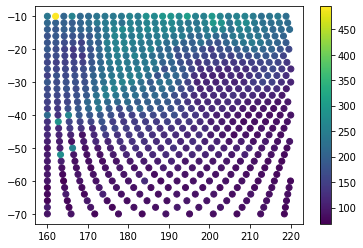

In [241]:
plt.scatter(l, b, c=T_0)
plt.colorbar()

Text(0.5, 0.98, 'Superbubble map using Nearest Interpolation to fill')

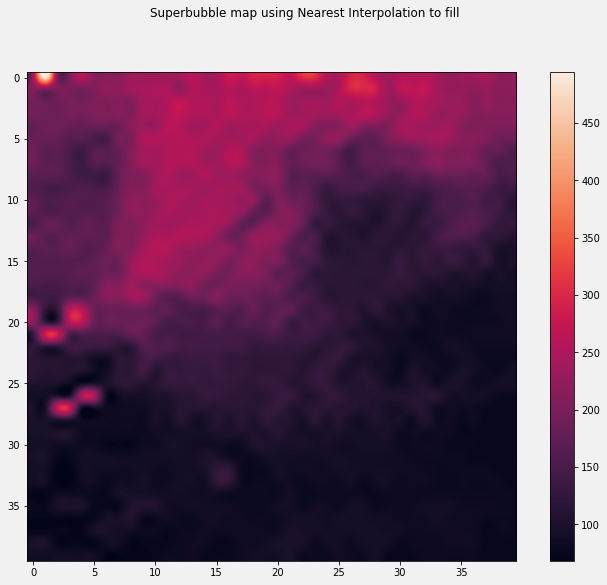

In [240]:
fig, ax = plt.subplots(figsize=[12,9], facecolor='#f1f1f1')
ls, bs = np.meshgrid(np.linspace(160,220,40), np.linspace(-10,-70,40))
spline = interpolate.NearestNDInterpolator((l, b), T_0)
t_interp = spline(ls, bs)
# plt.imshow(t_interp)
im = ax.imshow(t_interp, interpolation='spline36', cmap='rocket')
fig.colorbar(im)
fig.suptitle('Superbubble map using Nearest Interpolation to fill')